<span style="color: purple;font-size: 30px;">Analyze and Provide Insights on Amazon Sales Report.</span>

<span style="color: green;font-size: 27px;">Import Libraries</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Amazon Sale Report.csv')
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [3]:
# Check No. Of Rows and Columns
df.shape

(128976, 21)

In [4]:
# Check missing values
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [5]:
# check duplicated values
df.duplicated().sum()

168

In [6]:
## check the datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [7]:
# check number of unique values in each columns
df.nunique()

index                 128808
Order ID              120229
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Category                   9
Size                      11
Courier Status             4
Qty                       10
currency                   1
Amount                  1408
ship-city               8948
ship-state                69
ship-postal-code        9454
ship-country               1
B2B                        2
fulfilled-by               1
New                        0
PendingS                   0
dtype: int64

In [8]:
# check the Statistical summary of dataset
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


<span style="color: green;font-size: 30px;">Data Cleaning</span>

In [9]:
'''The best Practice before to clean the dataset make a another copy of the dataset. 
Because if a mistake is made during the cleaning process,
you can easily revert to the original dataset without having to reload or re-fetch the data.'''
df_copy = df.copy()

In [10]:
df_copy.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [12]:
# Firstly, remove the columns that have no data.
df_copy.drop(['New', 'PendingS'], axis = 1, inplace = True)

In [13]:
df_copy.head(3)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN


In [14]:
# Remove the index column because it has no use.
df_copy.drop('index', axis = 1, inplace = True)
df_copy.head(3)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN


In [15]:
#check the duplicated records
df_copy.duplicated().sum()

959

In [16]:
df_copy = df_copy.drop_duplicates(subset='Order ID', keep='first')
df_copy.duplicated().sum()

0

* Now there are no duplicate values

In [17]:
df_copy.shape

(120229, 18)

* After removing the duplicated records there are 120229 rows and 18 columns.

In [18]:
# Finding Some errors and Remove it by Checking each Columns in the Dataset.
df_copy.Date.dtypes

dtype('O')

In [19]:
# The date column is object type,convert it into datetime format.
df_copy['Date'] = pd.to_datetime(df_copy['Date'])


In [20]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120229 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            120229 non-null  object        
 1   Date                120229 non-null  datetime64[ns]
 2   Status              120229 non-null  object        
 3   Fulfilment          120229 non-null  object        
 4   Sales Channel       120229 non-null  object        
 5   ship-service-level  120229 non-null  object        
 6   Category            120229 non-null  object        
 7   Size                120229 non-null  object        
 8   Courier Status      120229 non-null  object        
 9   Qty                 120229 non-null  int64         
 10  currency            112834 non-null  object        
 11  Amount              112834 non-null  float64       
 12  ship-city           120201 non-null  object        
 13  ship-state          120201 non-nul

In [21]:
df_copy['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [22]:
df_copy['status'] = df_copy['Status'].str.split('-').str[0]
df_copy['order status'] = df_copy['Status'].str.split('-').str[1]
df_copy.head(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,status,order status
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,Cancelled,NaN
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,Shipped,Delivered to Buyer


In [23]:
df_copy['status'].unique()

array(['Cancelled', 'Shipped ', 'Shipped', 'Pending', 'Pending ',
       'Shipping'], dtype=object)

In [24]:
df_copy['order status'].unique()

array([nan, ' Delivered to Buyer', ' Returned to Seller',
       ' Rejected by Buyer', ' Lost in Transit', ' Out for Delivery',
       ' Returning to Seller', ' Picked Up', ' Waiting for Pick Up',
       ' Damaged'], dtype=object)

In [25]:
df_copy['order status'].isnull().sum()

90500

In [26]:
df_copy['order status'] = df_copy['order status'].replace(np.nan, "loading")
df_copy['order status'].unique()

array(['loading', ' Delivered to Buyer', ' Returned to Seller',
       ' Rejected by Buyer', ' Lost in Transit', ' Out for Delivery',
       ' Returning to Seller', ' Picked Up', ' Waiting for Pick Up',
       ' Damaged'], dtype=object)

In [27]:
df_copy['order status'].isnull().sum()

0

In [28]:
# handle the Fulfilment column
df_copy['Fulfilment'].unique()

array(['Merchant', 'Amazon'], dtype=object)

* There is no error in the Fulfilment column.

In [29]:
df_copy['Sales Channel'] = df_copy['Sales Channel'].replace('Amazon.in','Amazon')
df_copy['Sales Channel'].unique()

array(['Amazon', 'Non-Amazon'], dtype=object)

In [30]:
df_copy.head(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,status,order status
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,Cancelled,loading
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,Shipped,Delivered to Buyer


In [31]:
df_copy['ship-service-level'].unique()

array(['Standard', 'Expedited'], dtype=object)

* There is no errors in the 'ship-service-level' column.

In [32]:
df_copy['Category'].unique()

array(['T-shirt', 'Shirt', 'Blazzer', 'Trousers', 'Perfume', 'Socks',
       'Shoes', 'Wallet', 'Watch'], dtype=object)

* There is no error in the 'Category' column.

In [33]:
df_copy['Size'].unique()

array(['S', '3XL', 'XL', 'L', 'XXL', 'XS', '6XL', 'M', '4XL', 'Free',
       '5XL'], dtype=object)

There is no error in the 'Size' column.

In [34]:
df_copy['Courier Status'].unique()

array(['On the Way', 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

* There is no error in the 'Courier Status' column.

In [35]:
df_copy['Qty'].unique()

array([ 0,  1,  2, 15,  3,  9, 13,  5,  4], dtype=int64)

There is no error in the 'Qty' column.

In [36]:
df_copy['currency'].unique()

array(['INR', nan], dtype=object)

* There is no error in the 'currency' column.

In [37]:
# ship-city column
np.set_printoptions(threshold=np.inf)

In [38]:
df_copy['ship-city'] = df_copy['ship-city'].str.upper()

In [39]:
def clean_text(text):
    if isinstance(text, str):
        # Remove special characters and numbers, keeping only letters
        return re.sub(r'[^A-Za-z\s]', '', text)
    else:
        return text  # Return the original value if it's not a string


In [40]:
df_copy['ship-city'] = df_copy['ship-city'].apply(clean_text)

In [41]:
df_copy['ship-city'].isnull().sum()

28

In [42]:
df_copy['ship-city'] = df_copy['ship-city'].replace(np.nan, "NA")
df_copy['ship-city'].isnull().sum()

0

In [43]:
df_copy['ship-state'] = df_copy['ship-state'].str.upper()
df_copy['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'GUJARAT', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'GOA', 'MEGHALAYA', 'MANIPUR', 'TRIPURA',
       'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', nan, 'ANDAMAN & NICOBAR',
       'RAJSHTHAN', 'NL', 'MIZORAM', 'NEW DELHI',
       'PUNJAB/MOHALI/ZIRAKPUR', 'RJ', 'ORISSA', 'LAKSHADWEEP', 'PB',
       'APO', 'AR', 'PONDICHERRY', 'RAJSTHAN'], dtype=object)

In [44]:
df_copy['ship-state'] = df_copy['ship-state'].replace("NA","NAGALAND")
df_copy['ship-state'] = df_copy['ship-state'].replace("NL","NAGALAND")
df_copy['ship-state'] = df_copy['ship-state'].replace("RJ","RAJSTHAN")
df_copy['ship-state'] = df_copy['ship-state'].replace("PB","PUNJAB")
df_copy['ship-state'] = df_copy['ship-state'].replace("APO","ANDHRA PRADESH")
df_copy['ship-state'] = df_copy['ship-state'].replace("AR","ARUNACHAL PRADESH")
df_copy['ship-state'] = df_copy['ship-state'].replace("DELHI","NEW DELHI")
df_copy['ship-state'] = df_copy['ship-state'].replace("RAJSTHAN","RAJASTHAN")
df_copy['ship-state'] = df_copy['ship-state'].replace("RAJSHTHAN","RAJASTHAN")
df_copy['ship-state'] = df_copy['ship-state'].replace("PUNJAB/MOHALI/ZIRAKPUR","PUNJAB")

In [45]:
df_copy['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'NEW DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'GUJARAT', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'GOA', 'MEGHALAYA', 'MANIPUR', 'TRIPURA',
       'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', nan, 'ANDAMAN & NICOBAR',
       'MIZORAM', 'ORISSA', 'LAKSHADWEEP', 'PONDICHERRY'], dtype=object)

In [46]:
df_copy['ship-state'].isnull().sum()

28

In [47]:
df_copy['ship-state'] = df_copy['ship-state'].replace(np.nan,"NA")
df_copy['ship-state'].isnull().sum()

0

In [48]:
df_copy['ship-country'].unique()

array(['IN', nan], dtype=object)

In [49]:
df_copy['ship-country'] = df_copy['ship-country'].map({'IN': 'INDIA', np.nan : 'INDIA'})
df_copy['ship-country'].unique()

array(['INDIA'], dtype=object)

In [50]:
df_copy['B2B'].unique()

array([False,  True])

In [51]:
df_copy['fulfilled-by'].unique()

array(['Easy Ship', nan], dtype=object)

In [52]:
df_copy['fulfilled-by'].isnull().sum()

83906

In [53]:
df_copy['fulfilled-by'] = df_copy['fulfilled-by'].replace(np.nan, "NA")
df_copy['fulfilled-by'].isnull().sum()

0

In [54]:
df_copy['currency'].unique()


array(['INR', nan], dtype=object)

In [55]:
df_copy['currency'] = df_copy['currency'].replace(np.nan,"INR")
df_copy['currency'].unique()

array(['INR'], dtype=object)

In [56]:
df_copy.isnull().sum()

Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency                 0
Amount                7395
ship-city                0
ship-state               0
ship-postal-code        28
ship-country             0
B2B                      0
fulfilled-by             0
status                   0
order status             0
dtype: int64

In [57]:
df_copy['ship-postal-code'] = df_copy['ship-postal-code'].replace(np.nan,'None')
df_copy.isnull().sum()

Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency                 0
Amount                7395
ship-city                0
ship-state               0
ship-postal-code         0
ship-country             0
B2B                      0
fulfilled-by             0
status                   0
order status             0
dtype: int64

In [58]:
df_copy.dropna(inplace=True)
df_copy.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
status                0
order status          0
dtype: int64

+ There is no null values in the data

In [59]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112834 entries, 0 to 128975
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            112834 non-null  object        
 1   Date                112834 non-null  datetime64[ns]
 2   Status              112834 non-null  object        
 3   Fulfilment          112834 non-null  object        
 4   Sales Channel       112834 non-null  object        
 5   ship-service-level  112834 non-null  object        
 6   Category            112834 non-null  object        
 7   Size                112834 non-null  object        
 8   Courier Status      112834 non-null  object        
 9   Qty                 112834 non-null  int64         
 10  currency            112834 non-null  object        
 11  Amount              112834 non-null  float64       
 12  ship-city           112834 non-null  object        
 13  ship-state          112834 non-nul

In [60]:
df_copy[(df_copy['Qty'] == 0) & (df_copy['Amount'] != 0)].head(5)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,status,order status
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,INDIA,False,Easy Ship,Cancelled,loading
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,INDIA,False,Easy Ship,Cancelled,loading
23,404-6019946-2909948,2022-04-30,Cancelled,Merchant,Amazon,Standard,T-shirt,M,On the Way,0,INR,570.48,PUNE,MAHARASHTRA,411044.0,INDIA,False,Easy Ship,Cancelled,loading
83,404-6522553-9345930,2022-04-30,Cancelled,Merchant,Amazon,Standard,T-shirt,M,On the Way,0,INR,1105.36,DEHRADUN,UTTARAKHAND,248001.0,INDIA,False,Easy Ship,Cancelled,loading
178,171-1224053-5752314,2022-04-30,Cancelled,Merchant,Amazon,Standard,Trousers,L,On the Way,0,INR,463.81,BENGALURU,KARNATAKA,560087.0,INDIA,False,Easy Ship,Cancelled,loading


In [61]:
# create a new column total amount 
df_copy['Total Amount'] = df_copy['Qty'] * df_copy['Amount']
df_copy.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,status,order status,Total Amount
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon,Standard,T-shirt,S,On the Way,0,...,647.62,MUMBAI,MAHARASHTRA,400081.0,INDIA,False,Easy Ship,Cancelled,loading,0.0
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon,Standard,Shirt,3XL,Shipped,1,...,406.00,BENGALURU,KARNATAKA,560085.0,INDIA,False,Easy Ship,Shipped,Delivered to Buyer,406.0
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon,Expedited,Shirt,XL,Shipped,1,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,INDIA,True,NA,Shipped,loading,329.0
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon,Standard,Blazzer,L,On the Way,0,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,INDIA,False,Easy Ship,Cancelled,loading,0.0
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon,Expedited,Trousers,3XL,Shipped,1,...,574.00,CHENNAI,TAMIL NADU,600073.0,INDIA,False,NA,Shipped,loading,574.0


In [62]:
df_copy.shape

(112834, 21)

In [63]:
# change column name
change_column = { 'ship-service-level' : 'Service',
                 'ship-city' : 'City',
                 'ship-state' : 'State',
                 'ship-postal-code' : 'Postal Code',
                 'ship-country' : 'Country'
}
df_copy = df_copy.rename(columns= change_column)
df_copy.head(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,...,Amount,City,State,Postal Code,Country,B2B,fulfilled-by,status,order status,Total Amount
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon,Standard,T-shirt,S,On the Way,0,...,647.62,MUMBAI,MAHARASHTRA,400081.0,INDIA,False,Easy Ship,Cancelled,loading,0.0
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon,Standard,Shirt,3XL,Shipped,1,...,406.00,BENGALURU,KARNATAKA,560085.0,INDIA,False,Easy Ship,Shipped,Delivered to Buyer,406.0


In [64]:
# drop Status Column
df_copy.drop('Status', axis = 1, inplace = True)
df_copy.head(2)

,Order ID,Date,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,currency,Amount,City,State,Postal Code,Country,B2B,fulfilled-by,status,order status,Total Amount
0,405-8078784-5731545,2022-04-30,Merchant,Amazon,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,INDIA,False,Easy Ship,Cancelled,loading,0.0
1,171-9198151-1101146,2022-04-30,Merchant,Amazon,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,INDIA,False,Easy Ship,Shipped,Delivered to Buyer,406.0


In [65]:
# seperate year, month, day
df_copy['Day'] = df_copy['Date'].dt.day
df_copy['Month'] = df_copy['Date'].dt.month
df_copy['Year'] = df_copy['Date'].dt.year
df_copy.head()

,Order ID,Date,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,currency,...,Postal Code,Country,B2B,fulfilled-by,status,order status,Total Amount,Day,Month,Year
0,405-8078784-5731545,2022-04-30,Merchant,Amazon,Standard,T-shirt,S,On the Way,0,INR,...,400081.0,INDIA,False,Easy Ship,Cancelled,loading,0.0,30,4,2022
1,171-9198151-1101146,2022-04-30,Merchant,Amazon,Standard,Shirt,3XL,Shipped,1,INR,...,560085.0,INDIA,False,Easy Ship,Shipped,Delivered to Buyer,406.0,30,4,2022
2,404-0687676-7273146,2022-04-30,Amazon,Amazon,Expedited,Shirt,XL,Shipped,1,INR,...,410210.0,INDIA,True,NA,Shipped,loading,329.0,30,4,2022
3,403-9615377-8133951,2022-04-30,Merchant,Amazon,Standard,Blazzer,L,On the Way,0,INR,...,605008.0,INDIA,False,Easy Ship,Cancelled,loading,0.0,30,4,2022
4,407-1069790-7240320,2022-04-30,Amazon,Amazon,Expedited,Trousers,3XL,Shipped,1,INR,...,600073.0,INDIA,False,NA,Shipped,loading,574.0,30,4,2022


In [66]:
# month column
df_copy['Month'].unique()

array([4, 3, 5, 6])

In [67]:
# year column
df_copy['Year'].unique()

array([2022])

In [68]:
# extract month name from date column
df_copy['month_name'] = df_copy['Date'].dt.month_name()
df_copy.head(3)

,Order ID,Date,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,currency,...,Country,B2B,fulfilled-by,status,order status,Total Amount,Day,Month,Year,month_name
0,405-8078784-5731545,2022-04-30,Merchant,Amazon,Standard,T-shirt,S,On the Way,0,INR,...,INDIA,False,Easy Ship,Cancelled,loading,0.0,30,4,2022,April
1,171-9198151-1101146,2022-04-30,Merchant,Amazon,Standard,Shirt,3XL,Shipped,1,INR,...,INDIA,False,Easy Ship,Shipped,Delivered to Buyer,406.0,30,4,2022,April
2,404-0687676-7273146,2022-04-30,Amazon,Amazon,Expedited,Shirt,XL,Shipped,1,INR,...,INDIA,True,NA,Shipped,loading,329.0,30,4,2022,April


In [69]:
# check one last time the dataset before save the data file
df_copy.duplicated().sum()

0

In [70]:
df_copy.isnull().sum()

Order ID          0
Date              0
Fulfilment        0
Sales Channel     0
Service           0
Category          0
Size              0
Courier Status    0
Qty               0
currency          0
Amount            0
City              0
State             0
Postal Code       0
Country           0
B2B               0
fulfilled-by      0
status            0
order status      0
Total Amount      0
Day               0
Month             0
Year              0
month_name        0
dtype: int64

In [71]:
df_copy.head()

,Order ID,Date,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,currency,...,Country,B2B,fulfilled-by,status,order status,Total Amount,Day,Month,Year,month_name
0,405-8078784-5731545,2022-04-30,Merchant,Amazon,Standard,T-shirt,S,On the Way,0,INR,...,INDIA,False,Easy Ship,Cancelled,loading,0.0,30,4,2022,April
1,171-9198151-1101146,2022-04-30,Merchant,Amazon,Standard,Shirt,3XL,Shipped,1,INR,...,INDIA,False,Easy Ship,Shipped,Delivered to Buyer,406.0,30,4,2022,April
2,404-0687676-7273146,2022-04-30,Amazon,Amazon,Expedited,Shirt,XL,Shipped,1,INR,...,INDIA,True,NA,Shipped,loading,329.0,30,4,2022,April
3,403-9615377-8133951,2022-04-30,Merchant,Amazon,Standard,Blazzer,L,On the Way,0,INR,...,INDIA,False,Easy Ship,Cancelled,loading,0.0,30,4,2022,April
4,407-1069790-7240320,2022-04-30,Amazon,Amazon,Expedited,Trousers,3XL,Shipped,1,INR,...,INDIA,False,NA,Shipped,loading,574.0,30,4,2022,April


<span style="color: Green;font-size:30px">Exploratory Data Analysis and visualization</span>

<span style="color: purple;font-size: 25px;">1. Sales Overview: Understand the overall sales performance, trends, and patterns over time.</span> 

In [72]:
# preprocessing the data
df_copy = df_copy.sort_values(by='Date')
df_copy.head(3)

,Order ID,Date,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,currency,...,Country,B2B,fulfilled-by,status,order status,Total Amount,Day,Month,Year,month_name
48971,404-1445673-1345134,2022-03-31,Merchant,Amazon,Standard,Shirt,L,Shipped,1,INR,...,INDIA,False,Easy Ship,Shipped,Delivered to Buyer,495.0,31,3,2022,March
48997,402-0339394-3540335,2022-03-31,Amazon,Amazon,Expedited,T-shirt,XL,Shipped,1,INR,...,INDIA,False,NA,Shipped,loading,688.0,31,3,2022,March
48998,408-6597776-7485121,2022-03-31,Amazon,Amazon,Expedited,Trousers,XS,Shipped,1,INR,...,INDIA,False,NA,Shipped,loading,354.0,31,3,2022,March


In [73]:
df_copy = df_copy.drop(['Day', 'Month', 'Year', 'month_name'], axis = 1)
df_copy.head(3)

,Order ID,Date,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,currency,Amount,City,State,Postal Code,Country,B2B,fulfilled-by,status,order status,Total Amount
48971,404-1445673-1345134,2022-03-31,Merchant,Amazon,Standard,Shirt,L,Shipped,1,INR,495.0,KOLKATA,WEST BENGAL,700124.0,INDIA,False,Easy Ship,Shipped,Delivered to Buyer,495.0
48997,402-0339394-3540335,2022-03-31,Amazon,Amazon,Expedited,T-shirt,XL,Shipped,1,INR,688.0,GHAZIABAD,UTTAR PRADESH,201005.0,INDIA,False,NA,Shipped,loading,688.0
48998,408-6597776-7485121,2022-03-31,Amazon,Amazon,Expedited,Trousers,XS,Shipped,1,INR,354.0,DELHI,NEW DELHI,110016.0,INDIA,False,NA,Shipped,loading,354.0


In [74]:
df_copy = df_copy.rename(columns={'Total Amount' : 'Total Sales'})

Aggregate the sales data to analyze trends over different time periods like daily, monthly, quarterly, or yearly.

In [75]:
monthly_sales = df_copy.resample('M', on='Date').sum(numeric_only=True)
print(monthly_sales)


              Qty       Amount  B2B  Total Sales
Date                                            
2022-03-31    144     95971.85    0      92549.0
2022-04-30  41035  26867098.20  298   25886087.0
2022-05-31  35403  24472622.32  250   23619231.0
2022-06-30  31888  21887776.50  220   21270794.0


<span style="color: green;font-size: 25px">Insights and Observations.</span>


* March 2022: 0.093 million in total sales, minimal activity.
* April 2022: 25.89 million in total sales, peak performance.
* May 2022: 23.62 million in total sales, slight decline.
* June 2022: 21.27 million in total sales, continued downward trend.
* Overall, sales peaked in April and then gradually declined over the following months.

In [76]:
yearly_sales = df_copy.resample('Y', on = 'Date').sum(numeric_only=True)
yearly_sales

,Qty,Amount,B2B,Total Sales
Date,,,,
2022-12-31,108470,73323468.87,768,70868661.0


<span style="color: Green;font-size:25px">Insights and Observations</span>

* year 2022: 70.87 million in total sales, with 108,470 units sold. The sales include 0.0008 million in B2B transactions.

<span style="font-size:25px; color: green">Visualize Sales Trends.</span>

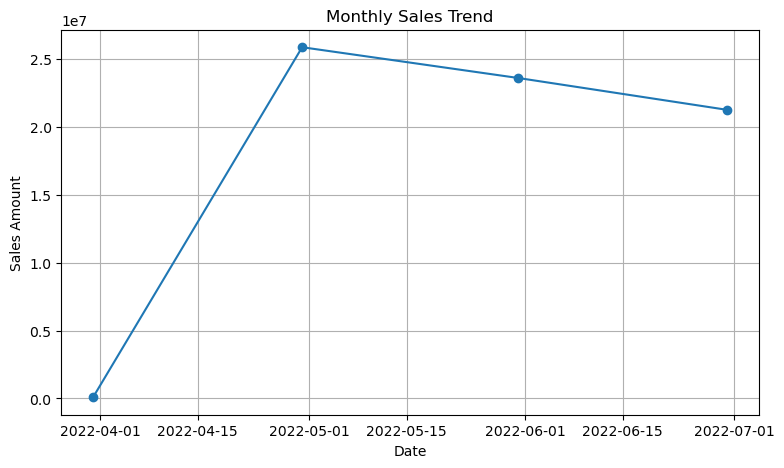

In [77]:
plt.figure(figsize = (9,5))
plt.plot(monthly_sales.index, monthly_sales['Total Sales'], marker = 'o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()

* Overall sales high in April and then gradually decreased over the following months

<span style="color: Green;font-size:25px">Analyze Sales by Categories</span>

In [78]:
Category_sales = df_copy.groupby(['Category', pd.Grouper(key = 'Date', freq= 'M')])['Total Sales'].sum().unstack()
Category_sales


Date,2022-03-31,2022-04-30,2022-05-31,2022-06-30
Category,,,,
Blazzer,5479.0,2647107.0,3930309.0,3545296.0
Perfume,1099.0,220401.0,255662.0,226770.0
Shirt,30343.0,7058269.0,5957438.0,5942321.0
Shoes,NaN,41128.0,43218.0,23993.0
Socks,NaN,58656.0,41206.0,31842.0
T-shirt,50837.0,13990667.0,11416137.0,10002619.0
Trousers,4511.0,1686374.0,1830115.0,1401518.0
Wallet,280.0,183485.0,145146.0,96130.0
Watch,NaN,NaN,NaN,305.0


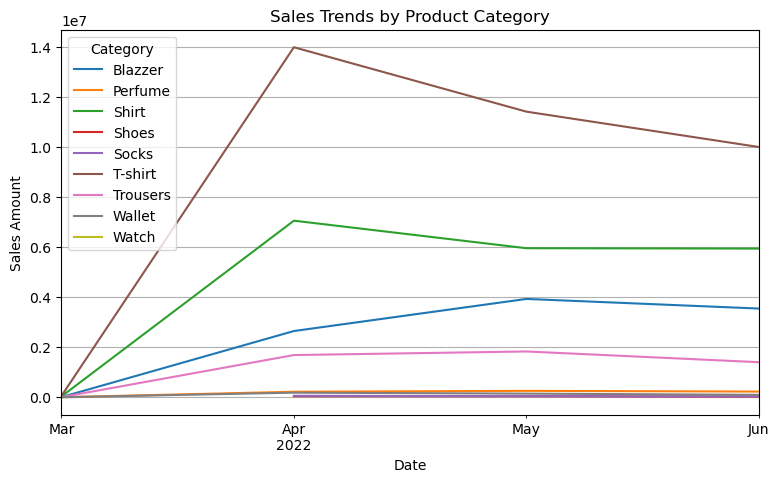

In [79]:
# Plotting sales trends by category
Category_sales.T.plot(kind='line', figsize=(9, 5))
plt.title('Sales Trends by Product Category')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()

<span style="color: green;font-size: 25px">Insights and Observations.</span>

* T-shirts and Shirts consistently generated the highest sales, with T-shirts peaking in April.
* Blazzer and Trousers also saw significant sales but with more fluctuation.
* Perfume, Shoes, Socks, Wallet, and Watch had lower sales overall, with some categories like Shoes and Socks having no sales in March.

<span style="color: purple;font-size: 25px">2. Product Analysis: Analyze the distribution of product categories, sizes, and quantities sold to identify popular products..</span>

In [80]:
# Analyzing Distribution of product categories
category_distribution = df_copy['Category'].value_counts()
category_distribution

Category
T-shirt     44052
Shirt       42888
Blazzer     13938
Trousers     9572
Perfume      1017
Wallet        846
Socks         386
Shoes         134
Watch           1
Name: count, dtype: int64

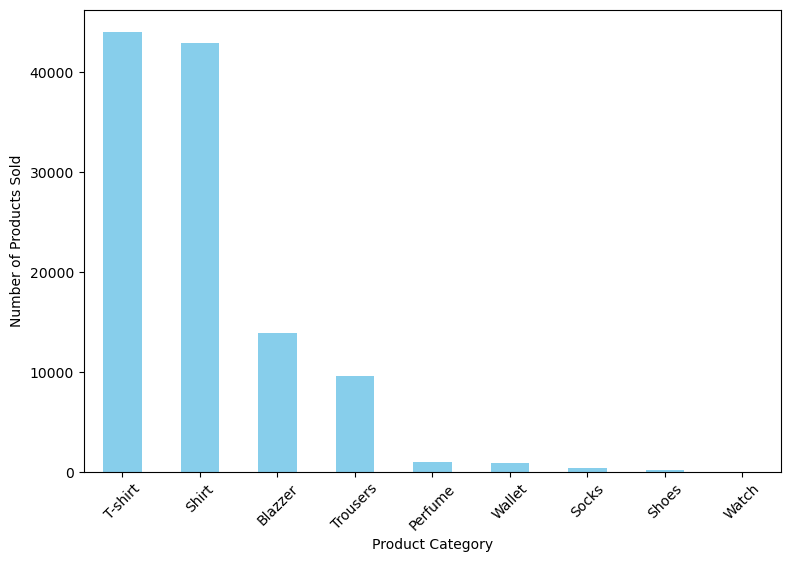

In [81]:
# plotting the distribution of product category
plt.figure(figsize = (9,6))
category_distribution.plot(kind = 'bar', color = 'skyblue')
plt.xlabel('Product Category')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45)
plt.show()

<span style="color: green;font-size: 25px">Insights and Observations.</span>

In [82]:
size_distribution = df_copy['Size'].value_counts()
size_distribution

Size
M       19731
L       19072
XL      18146
XXL     15595
S       14647
3XL     12717
XS       9418
Free     1998
6XL       643
5XL       496
4XL       371
Name: count, dtype: int64

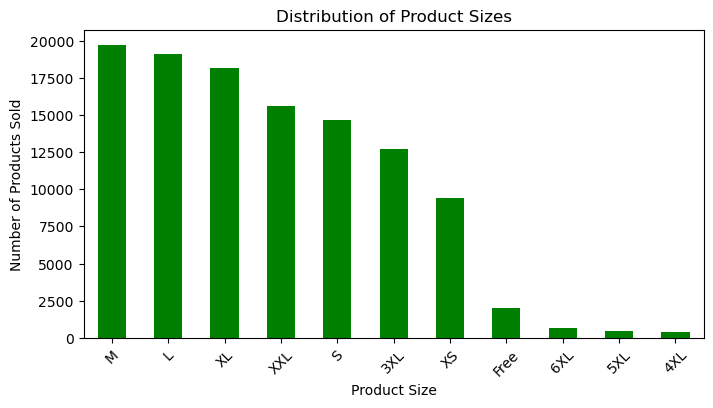

In [83]:
# plotting the size distribution
plt.figure(figsize = (8,4))
size_distribution.plot(kind = 'bar' , color = 'green' )
plt.title('Distribution of Product Sizes')
plt.xlabel('Product Size')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45)
plt.show()

<span style="color: green;font-size: 25px">Insights and Observations.</span>

* Medium (M) and Large (L) are the most popular sizes, with nearly equal high quantities sold.
* Extra Large (XL) and Double Extra Large (XXL) follow, showing strong sales.
* Small (S) and Triple Extra Large (3XL) also have substantial quantities sold.
* Extra Small (XS) and Free Size have lower sales compared to the other sizes.
* 6XL, 5XL, and 4XL are the least sold sizes, with significantly lower quantities.

In [84]:
# Analyze Quantities sold by product category
quantity_by_category = df_copy.groupby('Category')['Qty'].sum().sort_values(ascending = False)
quantity_by_category

Category
T-shirt     42364
Shirt       41290
Blazzer     13208
Trousers     9320
Perfume       979
Wallet        811
Socks         367
Shoes         130
Watch           1
Name: Qty, dtype: int64

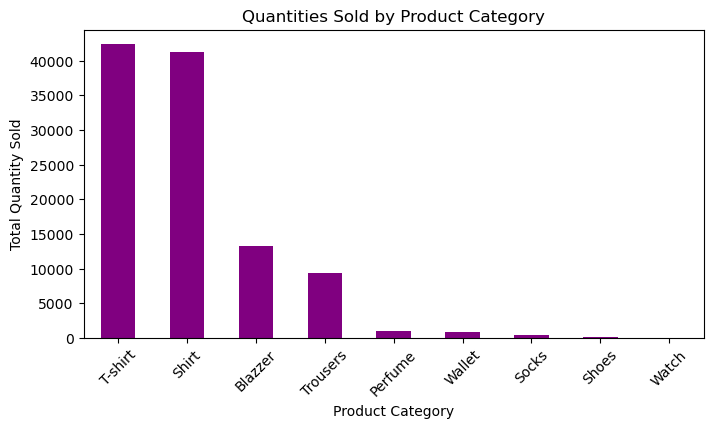

In [85]:
# plotting quantity sold by product category
plt.figure(figsize = (8,4))
quantity_by_category.plot(kind = 'bar', color = 'purple')
plt.title('Quantities Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation = 45)
plt.show()

<span style="color: green;font-size: 25px">Insights and Observations.</span>

* T-shirts and Shirts are the top-selling categories, with T-shirts leading in quantity sold.
* Blazzer follows, with a significantly lower quantity compared to T-shirts and Shirts.
* Trousers also show a notable amount of sales.
* Perfume and Wallet have moderate quantities sold.
* Socks and Shoes have low sales, with Shoes having the least quantity sold.
* Watch has minimal sales with only 1 unit sold.

In [86]:
# Analyze Quantities Sold by Product Size
quantity_by_size = df_copy.groupby('Size')['Qty'].sum().sort_values(ascending = False)
quantity_by_size

Size
M       18922
L       18325
XL      17393
XXL     15083
S       14048
3XL     12234
XS       9076
Free     1921
6XL       624
5XL       483
4XL       361
Name: Qty, dtype: int64

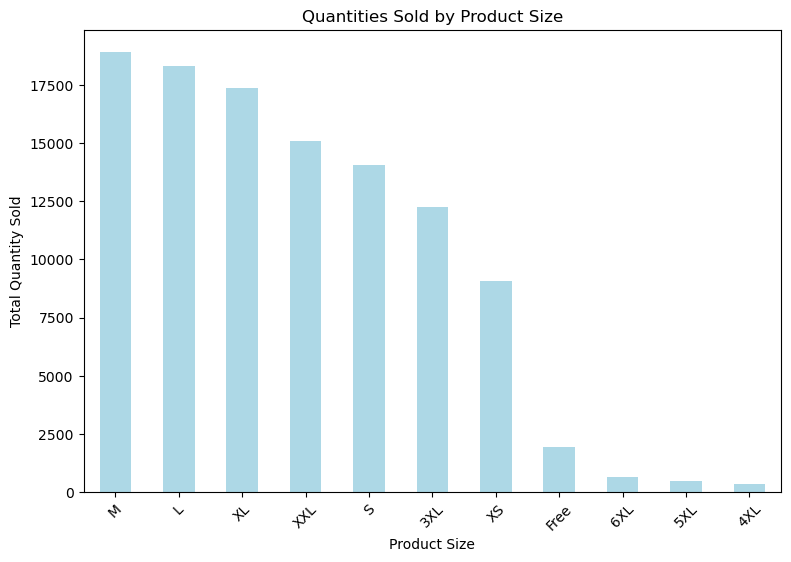

In [87]:
# plotting the quantities sold by product size
plt.figure(figsize = (9,6))
quantity_by_size.plot(kind = 'bar', color = 'lightblue')
plt.title('Quantities Sold by Product Size')
plt.xlabel('Product Size')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation = 45)
plt.show()

<span style="color: green;font-size: 25px">Insights and Observations.</span>

* Medium (M) and Large (L) sizes are the most popular, with Medium slightly ahead in quantity sold.
* Extra Large (XL) and Double Extra Large (XXL) follow, with substantial sales.
* Small (S) and Triple Extra Large (3XL) have strong sales, though less than the larger sizes.
* Extra Small (XS) and Free Size have lower sales volumes.
* 6XL, 5XL, and 4XL are the least sold sizes, with significantly fewer units sold.

In [88]:
# Identify the most Popular Products
popular_products = df_copy.groupby(['Category', 'Size'])['Qty'].sum().sort_values(ascending = False)
popular_products.head(10) ## Top Products

Category  Size
T-shirt   M       7911
Shirt     L       7358
          XL      7223
          M       7142
T-shirt   L       6938
          XL      6466
Shirt     XXL     6368
T-shirt   S       6293
          XXL     5210
          3XL     4852
Name: Qty, dtype: int64

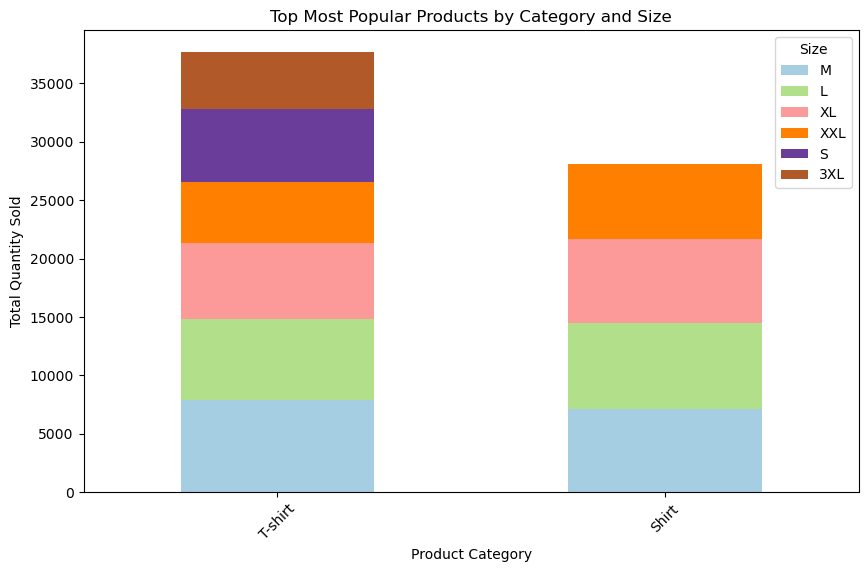

In [89]:
# visualize top popular Products
popular_products.head(10).unstack().plot(kind = 'bar', stacked = True, figsize = (10,6), colormap = 'Paired' )
plt.title('Top Most Popular Products by Category and Size')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation = 45)
plt.show()

<span style="color: green;font-size: 25px">Insights and Observations.</span>

* T-shirts are sold in all sizes, with Medium and Large being the top-selling sizes.
* Shirts also have substantial sales across multiple sizes, with Large and Extra Large leading in quantity sold.
* Both T-shirts and Shirts show strong performance in sizes M and L, while T-shirts have notable sales in Small and XXL as well.

In [90]:
# Correlation Trends
correlation_matrix = df_copy.corr(numeric_only=True)
correlation_matrix

,Qty,Amount,B2B,Total Sales
Qty,1.000000,0.056792,0.015154,0.488467
Amount,0.056792,1.000000,0.015862,0.849273
B2B,0.015154,0.015862,1.000000,0.026812
Total Sales,0.488467,0.849273,0.026812,1.000000


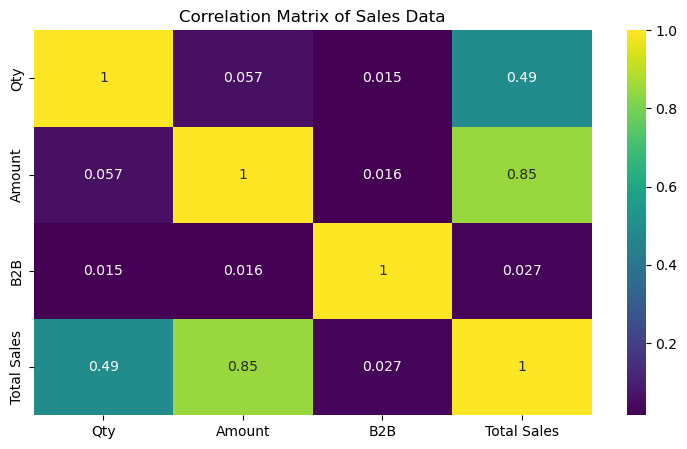

In [91]:
plt.figure(figsize=(9, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix of Sales Data')
plt.show()

<span style="color: green;font-size: 25px">Insights and Observations.</span>

* Total Sales and Amount have the strongest positive correlation, indicating that the total amount generated is closely related to Total Sales.
* Quantity Sold has a moderate correlation with Total Sales, suggesting that higher quantities tend to drive higher total sales.
* B2B Sales have very weak correlations with the other variables, indicating that B2B transactions have minimal impact on the overall metrics in this dataset.

<span style="color: purple;font-size: 25px">3. Fulﬁllment Analysis: Investigate the fulﬁllment methods used and their eﬀectiveness in delivering orders.</span>

In [92]:
# Analyze Fulfillment methods Distribution
fulfillment_distribution = df_copy['Fulfilment'].value_counts()
fulfillment_distribution

Fulfilment
Amazon      78164
Merchant    34670
Name: count, dtype: int64

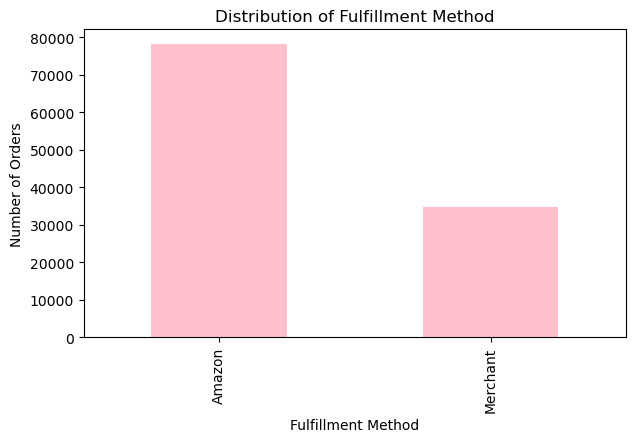

In [93]:
# plotting the fulfillment distribution
plt.figure(figsize = (7,4))
fulfillment_distribution.plot(kind = 'bar', color = 'pink')
plt.title('Distribution of Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Number of Orders')
plt.show()

<span style="color: green;font-size: 25px">Insights and Observations.</span>

* Amazon is the dominant fulfillment channel, with significantly higher sales compared to Merchant.
* Merchant fulfillment accounts for a smaller portion of the total sales, indicating that Amazon is the primary channel for these sales.

In [94]:
df_copy.head(4)

,Order ID,Date,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,currency,Amount,City,State,Postal Code,Country,B2B,fulfilled-by,status,order status,Total Sales
48971,404-1445673-1345134,2022-03-31,Merchant,Amazon,Standard,Shirt,L,Shipped,1,INR,495.0,KOLKATA,WEST BENGAL,700124.0,INDIA,False,Easy Ship,Shipped,Delivered to Buyer,495.0
48997,402-0339394-3540335,2022-03-31,Amazon,Amazon,Expedited,T-shirt,XL,Shipped,1,INR,688.0,GHAZIABAD,UTTAR PRADESH,201005.0,INDIA,False,NA,Shipped,loading,688.0
48998,408-6597776-7485121,2022-03-31,Amazon,Amazon,Expedited,Trousers,XS,Shipped,1,INR,354.0,DELHI,NEW DELHI,110016.0,INDIA,False,NA,Shipped,loading,354.0
48999,404-1415044-3213110,2022-03-31,Amazon,Amazon,Expedited,T-shirt,3XL,Shipped,1,INR,698.0,SIKAR,RAJASTHAN,332001.0,INDIA,False,NA,Shipped,loading,698.0


In [95]:
df_copy['Courier Status'].unique()

array(['Shipped', 'On the Way', 'Unshipped'], dtype=object)

In [96]:
df_copy['status'].unique()

array(['Shipped ', 'Shipped', 'Cancelled', 'Pending', 'Pending '],
      dtype=object)

In [97]:
df_copy['order status'].unique()

array([' Delivered to Buyer', 'loading', ' Returned to Seller',
       ' Rejected by Buyer', ' Picked Up', ' Returning to Seller',
       ' Out for Delivery', ' Lost in Transit', ' Damaged',
       ' Waiting for Pick Up'], dtype=object)

In [98]:
df_copy = df_copy.rename(columns= {'status': 'Pre order status', 'order status': 'Post order status'})
df_copy.head(3)

,Order ID,Date,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,currency,Amount,City,State,Postal Code,Country,B2B,fulfilled-by,Pre order status,Post order status,Total Sales
48971,404-1445673-1345134,2022-03-31,Merchant,Amazon,Standard,Shirt,L,Shipped,1,INR,495.0,KOLKATA,WEST BENGAL,700124.0,INDIA,False,Easy Ship,Shipped,Delivered to Buyer,495.0
48997,402-0339394-3540335,2022-03-31,Amazon,Amazon,Expedited,T-shirt,XL,Shipped,1,INR,688.0,GHAZIABAD,UTTAR PRADESH,201005.0,INDIA,False,NA,Shipped,loading,688.0
48998,408-6597776-7485121,2022-03-31,Amazon,Amazon,Expedited,Trousers,XS,Shipped,1,INR,354.0,DELHI,NEW DELHI,110016.0,INDIA,False,NA,Shipped,loading,354.0


In [99]:
df_copy = df_copy.rename(columns = {'Post order status': 'order status'})
df_copy = df_copy.drop('Pre order status', axis = 1)
df_copy.head(2)

,Order ID,Date,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,currency,Amount,City,State,Postal Code,Country,B2B,fulfilled-by,order status,Total Sales
48971,404-1445673-1345134,2022-03-31,Merchant,Amazon,Standard,Shirt,L,Shipped,1,INR,495.0,KOLKATA,WEST BENGAL,700124.0,INDIA,False,Easy Ship,Delivered to Buyer,495.0
48997,402-0339394-3540335,2022-03-31,Amazon,Amazon,Expedited,T-shirt,XL,Shipped,1,INR,688.0,GHAZIABAD,UTTAR PRADESH,201005.0,INDIA,False,NA,loading,688.0


In [100]:
# Analyze service distribution
service_distribution = df_copy['Service'].value_counts()
service_distribution

Service
Expedited    77251
Standard     35583
Name: count, dtype: int64

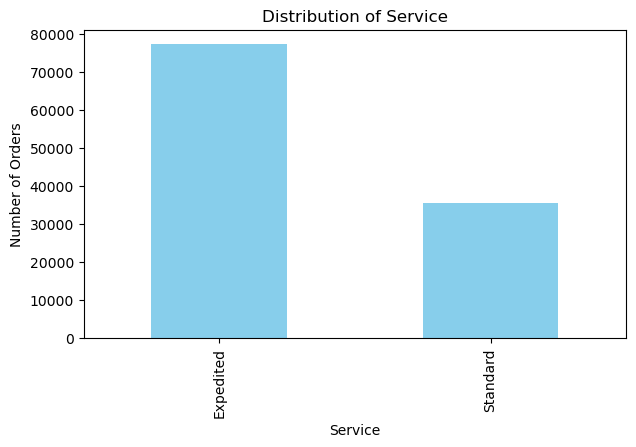

In [101]:
# plot service distribution
plt.figure(figsize = (7,4))
service_distribution.plot(kind = 'bar', color = 'skyblue')
plt.title('Distribution of Service')
plt.xlabel('Service')
plt.ylabel('Number of Orders')
plt.show()

<span style="color: green;font-size: 25px">Insights and Observations.</span>

* Expedited service is the preferred choice, with a significantly higher number of units fulfilled compared to Standard service.
* Standard service accounts for a smaller portion of the total sales, indicating that expedited delivery is more commonly used or preferred.

In [102]:
# Analyze Courier Status Distribution
courier_status_distribution = df_copy['Courier Status'].value_counts()
courier_status_distribution

Courier Status
Shipped       102049
Unshipped       6058
On the Way      4727
Name: count, dtype: int64

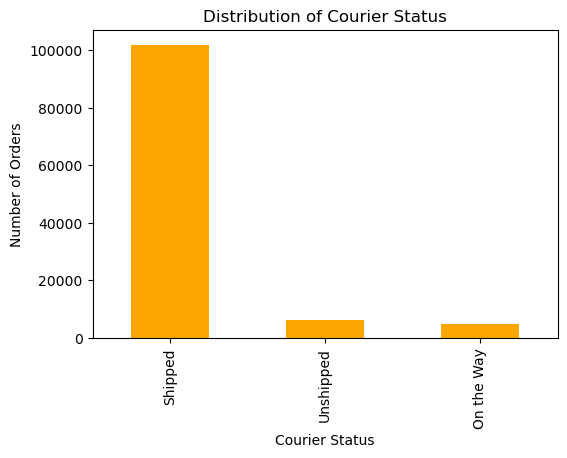

In [103]:
# plotting the courier status distribution
plt.figure(figsize = (6,4))
courier_status_distribution.plot(kind = 'bar', color = 'orange')
plt.title('Distribution of Courier Status')
plt.xlabel('Courier Status')
plt.ylabel('Number of Orders')
plt.show()

<span style="color: green;font-size: 25px">Insights and Observations.</span>

* Shipped is the predominant status, with a significantly higher number of units compared to Unshipped and On the Way.
* Unshipped and On the Way have much lower quantities, indicating that most of the orders have already been shipped.

In [104]:
# Order Status Distribution
order_status_distribution = df_copy['order status'].value_counts()
order_status_distribution

order status
loading                 83110
 Delivered to Buyer     26517
 Returned to Seller      1849
 Picked Up                918
 Waiting for Pick Up      262
 Returning to Seller      130
 Out for Delivery          32
 Rejected by Buyer         11
 Lost in Transit            4
 Damaged                    1
Name: count, dtype: int64

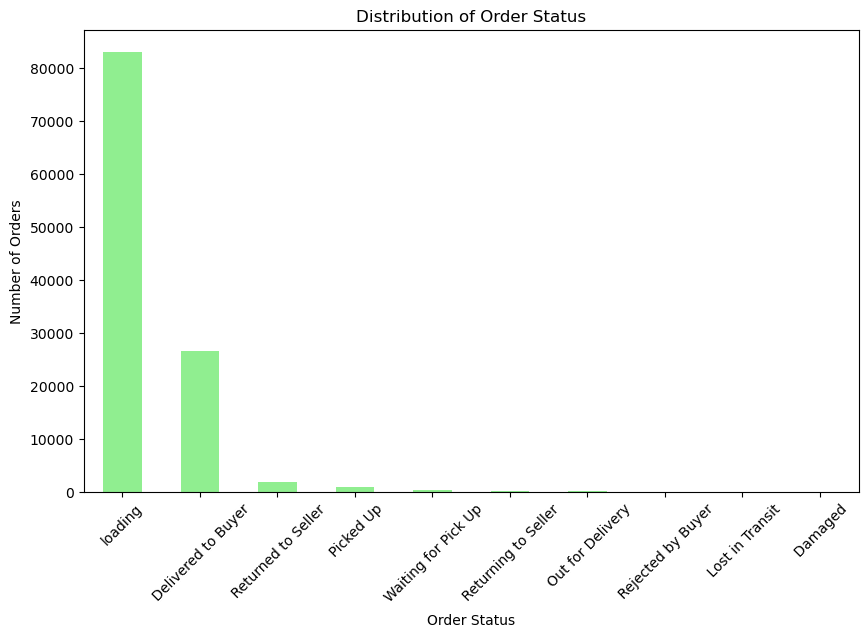

In [105]:
# plotting the pre order status distribution
plt.figure(figsize = (10,6))
order_status_distribution.plot(kind = 'bar', color = 'lightgreen')
plt.title('Distribution of Order Status')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 45)
plt.show()

<span style="color: green;font-size: 25px">Insights and Observations.</span>

* Loading has the highest quantity, indicating that a large number of orders are still in the process of being prepared or shipped.
* Delivered to Buyer shows a significant number of completed transactions.
* Returned to Seller and Picked Up have relatively small quantities compared to the other statuses.
* Waiting for Pick Up, Returning to Seller, and other statuses such as Out for Delivery, Rejected by Buyer, Lost in Transit, and Damaged have minimal quantities, indicating less frequent occurrences.

<span style="color: Black;font-size: 25px">Analyze Delivery Effectiveness.</span>

* On Time Delivery Rate

In [106]:
df_copy.head(3)

,Order ID,Date,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,currency,Amount,City,State,Postal Code,Country,B2B,fulfilled-by,order status,Total Sales
48971,404-1445673-1345134,2022-03-31,Merchant,Amazon,Standard,Shirt,L,Shipped,1,INR,495.0,KOLKATA,WEST BENGAL,700124.0,INDIA,False,Easy Ship,Delivered to Buyer,495.0
48997,402-0339394-3540335,2022-03-31,Amazon,Amazon,Expedited,T-shirt,XL,Shipped,1,INR,688.0,GHAZIABAD,UTTAR PRADESH,201005.0,INDIA,False,NA,loading,688.0
48998,408-6597776-7485121,2022-03-31,Amazon,Amazon,Expedited,Trousers,XS,Shipped,1,INR,354.0,DELHI,NEW DELHI,110016.0,INDIA,False,NA,loading,354.0


In [107]:
df_copy['order status'].unique()

array([' Delivered to Buyer', 'loading', ' Returned to Seller',
       ' Rejected by Buyer', ' Picked Up', ' Returning to Seller',
       ' Out for Delivery', ' Lost in Transit', ' Damaged',
       ' Waiting for Pick Up'], dtype=object)

In [108]:
df_copy['order status'] = df_copy['order status'].str.strip()
df_copy['On Time Delivery'] = df_copy['order status'].map({'Delivered to Buyer': 1, 'loading':0, 'Returned to Seller':0, 'Rejected by Buyer': 0, 'Picked Up':0, 'Returning to Seller': 0,'Out for Delivery': 0, 'Lost in Transit': 0, 'Damaged':0,'Waiting for Pick Up':0})
df_copy.head(2)

,Order ID,Date,Fulfilment,Sales Channel,Service,Category,Size,Courier Status,Qty,currency,Amount,City,State,Postal Code,Country,B2B,fulfilled-by,order status,Total Sales,On Time Delivery
48971,404-1445673-1345134,2022-03-31,Merchant,Amazon,Standard,Shirt,L,Shipped,1,INR,495.0,KOLKATA,WEST BENGAL,700124.0,INDIA,False,Easy Ship,Delivered to Buyer,495.0,1
48997,402-0339394-3540335,2022-03-31,Amazon,Amazon,Expedited,T-shirt,XL,Shipped,1,INR,688.0,GHAZIABAD,UTTAR PRADESH,201005.0,INDIA,False,NA,loading,688.0,0


In [109]:
df_copy['On Time Delivery'].unique()

array([1, 0], dtype=int64)

In [110]:
#  Now we find the on time delivery rate
on_time_delivery = df_copy.groupby('Fulfilment')['On Time Delivery'].mean()*100
on_time_delivery


Fulfilment
Amazon       0.000000
Merchant    76.483992
Name: On Time Delivery, dtype: float64

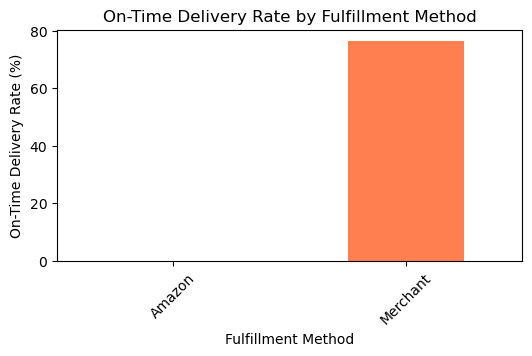

In [111]:
# plotting on time delivery rate by fulfilment method
plt.figure(figsize = (6,3))
on_time_delivery.plot(kind = 'bar', color = 'coral')
plt.title('On-Time Delivery Rate by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('On-Time Delivery Rate (%)')
plt.xticks(rotation=45)
plt.show()

<span style="color: green;font-size: 25px">Insights and Observations.</span>

* Amazon has an on-time delivery rate of 0%, which might indicate no data available or a reporting issue for this channel.
* Merchant has a substantial on-time delivery rate of 76.48%, suggesting that this channel performs well in terms of timely deliveries.

In [112]:
# Order Sucess Rate
success_rate = df_copy[df_copy['order status'] == 'Delivered to Buyer'].groupby('Fulfilment')['Order ID'].count()/df_copy.groupby('Fulfilment')['Order ID'].count()*100
success_rate

Fulfilment
Amazon            NaN
Merchant    76.483992
Name: Order ID, dtype: float64

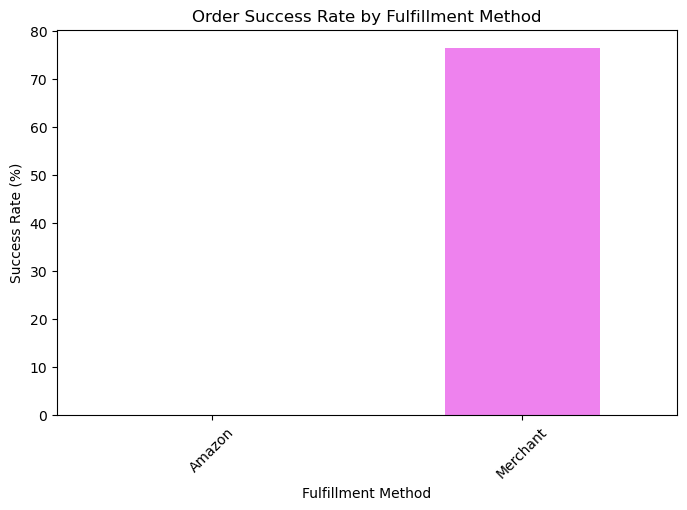

In [113]:
# Plotting order success rate by fulfillment method
plt.figure(figsize=(8,5))
success_rate.plot(kind='bar', color='violet')
plt.title('Order Success Rate by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.show()

<span style="color: green;font-size: 25px">Insights and Observations.</span>

* Amazon: No data available for the number of orders fulfilled through Amazon, indicating either missing data or no orders recorded for this channel.
* Merchant: A total of 76.48 orders were fulfilled, though the fractional value suggests it might be an average or aggregate figure.

<span style="color: Black;font-size: 25px">Analyze Trends Over Time.</span>

In [114]:
monthly_trends = df_copy.groupby([pd.Grouper(key = 'Date', freq = 'M'), 'Fulfilment'])['On Time Delivery'].mean().unstack()
monthly_trends

Fulfilment,Amazon,Merchant
Date,,
2022-03-31,0.0,0.695652
2022-04-30,0.0,0.796481
2022-05-31,0.0,0.810061
2022-06-30,0.0,0.656955


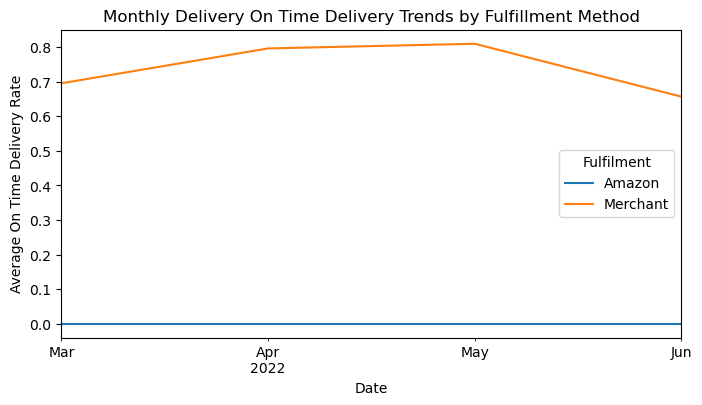

In [115]:
# Plotting the trends
monthly_trends.plot(kind='line', figsize=(8, 4))
plt.title('Monthly Delivery On Time Delivery Trends by Fulfillment Method')
plt.xlabel('Date')
plt.ylabel('Average On Time Delivery Rate')
plt.show()

<span style="color: green;font-size: 25px">Insights and Observations.</span>

* Amazon shows a fulfillment rate of 0.0 across all dates, indicating either no data available, no orders fulfilled, or an issue with reporting for Amazon.
* Merchant shows varying fulfillment rates across the dates: March 2022: 69.6% April 2022: 79.6% May 2022: 81.0% June 2022: 65.7%
* Merchant’s fulfillment rates are relatively high, with a peak in May and a decrease in June.

<span style="color: purple;font-size: 25px">4.Customer Segmentation: Segment customers based on their buying behavior, location, and other relevant factors.</span>

In [116]:
#  Feature Engineering
# Calculate total amount spent by each customer

In [117]:
customer_df = df.groupby('Order ID').agg({
    'Amount': 'sum',
    'Qty': 'sum',
    'ship-city': 'first',
    'ship-state': 'first',
    'ship-postal-code': 'first',
    'B2B': 'first'
}).reset_index()

In [118]:
# Rename columns for clarity
customer_df.rename(columns={
    'Amount': 'Total Amount Spent',
    'Qty': 'Total Quantity Purchased'
}, inplace=True)

In [119]:
# Print the new dataframe
print(customer_df.head())

              Order ID  Total Amount Spent  Total Quantity Purchased  \
0  171-0000547-8192359               301.0                         1   
1  171-0000902-4490745               544.0                         1   
2  171-0001409-6228339               422.0                         1   
3  171-0003082-5110755               563.0                         1   
4  171-0003738-2052324               379.0                         1   

          ship-city     ship-state  ship-postal-code    B2B  
0  PIMPRI CHINCHWAD    MAHARASHTRA          412101.0  False  
1            Howrah    WEST BENGAL          711104.0  False  
2             KODAD      TELANGANA          508206.0  False  
3     GREATER NOIDA  UTTAR PRADESH          201306.0  False  
4         FIROZABAD  UTTAR PRADESH          283203.0  False  


In [120]:
# Select features for clustering
features = customer_df[['Total Amount Spent', 'Total Quantity Purchased']]


In [121]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [122]:
# Determine the optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

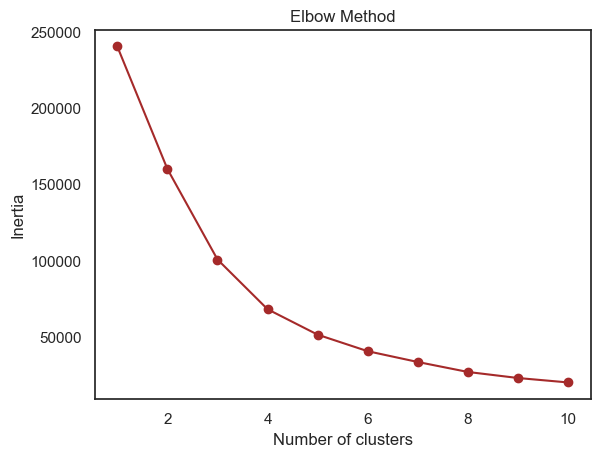

In [123]:
# Plot the elbow curve
sns.set(style='white')
plt.plot(range(1, 11), inertia, marker='o',color='brown')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [124]:
# Choose the optimal number of clusters 
optimal_clusters = 3

In [125]:

# Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(scaled_features)

In [126]:
print(customer_df.head())

              Order ID  Total Amount Spent  Total Quantity Purchased  \
0  171-0000547-8192359               301.0                         1   
1  171-0000902-4490745               544.0                         1   
2  171-0001409-6228339               422.0                         1   
3  171-0003082-5110755               563.0                         1   
4  171-0003738-2052324               379.0                         1   

          ship-city     ship-state  ship-postal-code    B2B  Cluster  
0  PIMPRI CHINCHWAD    MAHARASHTRA          412101.0  False        1  
1            Howrah    WEST BENGAL          711104.0  False        1  
2             KODAD      TELANGANA          508206.0  False        1  
3     GREATER NOIDA  UTTAR PRADESH          201306.0  False        1  
4         FIROZABAD  UTTAR PRADESH          283203.0  False        1  


In [127]:
# Analyze the clusters
cluster_analysis = customer_df.groupby('Cluster').agg({
    'Total Amount Spent': ['mean', 'sum'],
    'Total Quantity Purchased': ['mean', 'sum'],
    'ship-city': 'count',
    'ship-state': 'first',
    'ship-postal-code': 'first',
    'B2B': 'first'
}).reset_index()

In [128]:
# Rename columns for clarity
cluster_analysis.columns = [ 'Avg Amount Spent', 'Total Amount Spent', 
                            'Avg Quantity Purchased', 
                            'Total Quantity Purchased', 'Customer Count', 
                            'Representative City',
                            'Representative State', 
                            'Representative Postal Code', 'B2B']

In [129]:
# Print the cluster analysis
cluster_analysis

,Avg Amount Spent,Total Amount Spent,Avg Quantity Purchased,Total Quantity Purchased,Customer Count,Representative City,Representative State,Representative Postal Code,B2B
0,0,245.390105,2890450.05,0.000000,0,11775,Gujarat,382424.0,False
1,1,650.455620,66369889.60,1.000568,102094,102015,MAHARASHTRA,412101.0,False
2,2,1454.604085,9329830.60,2.268787,14552,6411,Gujarat,380015.0,False


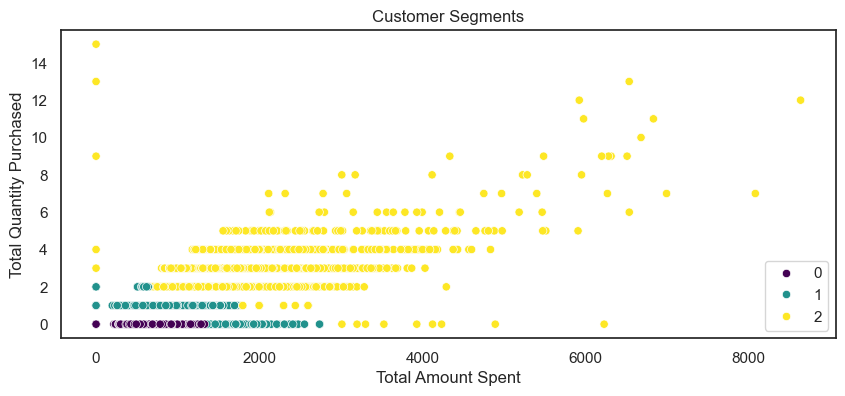

In [130]:
plt.figure(figsize=(10,4))
sns.set(style='white')
sns.scatterplot(x='Total Amount Spent', y='Total Quantity Purchased', hue='Cluster',
                data=customer_df, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Total Amount Spent')
plt.ylabel('Total Quantity Purchased')
plt.legend(loc='lower right')
plt.show()

## Key Findings:

## Cluster Distribution:
* Cluster 0 (Purple): Low spenders, infrequent buyers.
* Cluster 1 (Green): Moderate spenders, low frequency.
* Cluster 2 (Yellow): High spenders, frequent buyers with diverse spending patterns.
## customers Behavior:
* Cluster 0:Spend less and buy fewer items. May need more incentives to spend more.
* Cluster 1: Also spend less and buy fewer items, but with slightly different buying habits than Cluster 0.
* Cluster 2: Most diverse spending, including highest spenders and large quantity buyers. They are likely the most valuable customers


<span style="color: green;font-size: 25px">Insights:</span>
## High Spenders and Frequent Buyers (Cluster 2):
* This group spends a wide range of amounts.
* They are key to revenue, ideal for loyalty programs and special promotions.
## Moderate and Low Spenders (Clusters 0 and 1):
* These groups spend and buy less.
* They might be sensitive to price and may respond well to discounts and promotional offers.
* Use personalized marketing, targeted discounts, and incentives to boost their spending.

<span style="color: purple;font-size: 25px">5. Geographical Analysis: Explore the geographical distribution of sales, focusing on states and cities.</span>

* Aggregate Sales by State and City

In [131]:
df_copy['State'].unique()

array(['WEST BENGAL', 'UTTAR PRADESH', 'NEW DELHI', 'RAJASTHAN', 'KERALA',
       'TAMIL NADU', 'KARNATAKA', 'HARYANA', 'TELANGANA', 'MAHARASHTRA',
       'BIHAR', 'GUJARAT', 'TRIPURA', 'ANDHRA PRADESH', 'CHANDIGARH',
       'UTTARAKHAND', 'JHARKHAND', 'JAMMU & KASHMIR', 'ODISHA',
       'CHHATTISGARH', 'MADHYA PRADESH', 'GOA', 'ASSAM', 'PUNJAB',
       'HIMACHAL PRADESH', 'MEGHALAYA', 'MANIPUR', 'ANDAMAN & NICOBAR',
       'ARUNACHAL PRADESH', 'DADRA AND NAGAR', 'SIKKIM', 'PUDUCHERRY',
       'NAGALAND', 'MIZORAM', 'LADAKH', 'NA', 'LAKSHADWEEP', 'ORISSA',
       'PONDICHERRY'], dtype=object)

In [132]:
df_copy['State'] = df_copy['State'].replace('NA', 'NAGALAND')
## Aggregate Sales by state
sales_by_state = df_copy.groupby('State')['Total Sales'].sum().reset_index()
sales_by_state

,State,Total Sales
0,ANDAMAN & NICOBAR,138623.0
1,ANDHRA PRADESH,2803870.0
2,ARUNACHAL PRADESH,85415.0
3,ASSAM,944576.0
4,BIHAR,1299735.0
5,CHANDIGARH,190573.0
6,CHHATTISGARH,522418.0
7,DADRA AND NAGAR,34976.0
8,GOA,592715.0
9,GUJARAT,2432284.0


In [133]:
## Aggregate Sales by city 
sales_by_city = df_copy.groupby(['City'])['Total Sales'].sum().reset_index()

<Figure size 800x500 with 0 Axes>

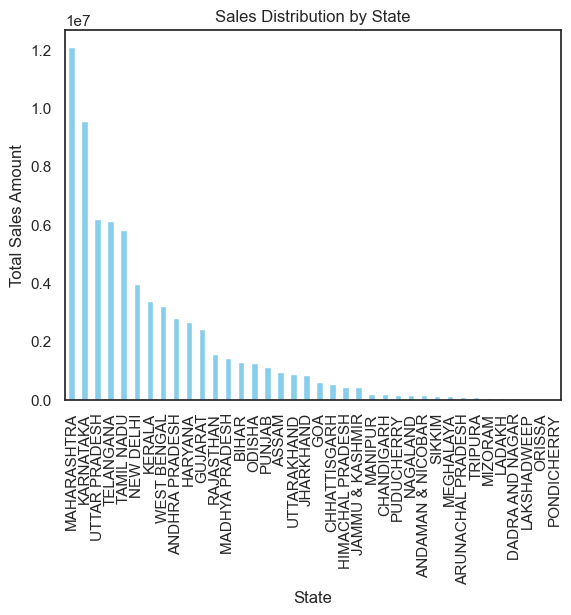

In [134]:
# Visualize Sales Distribution by State
# Plotting sales distribution by state
plt.figure(figsize=(8,5))
sales_by_state.sort_values(by='Total Sales', ascending=False).plot(kind='bar', x='State', y='Total Sales', color='skyblue', legend=False)
plt.title('Sales Distribution by State')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.show()

<span style="color: green;font-size: 25px">Insights and Observations.</span>

* Maharashtra has the highest total sales with over 12 million.
* Karnataka, Telangana, Uttar Pradesh, and Tamil Nadu also have high sales figures, all above 5 million.
* Lakshadweep, Pondicherry, and Orissa have the lowest sales, with figures under 3,000.
* The Northern and Southern regions, particularly Maharashtra, Karnataka, and Tamil Nadu, dominate the sales distribution.

<Figure size 1400x1000 with 0 Axes>

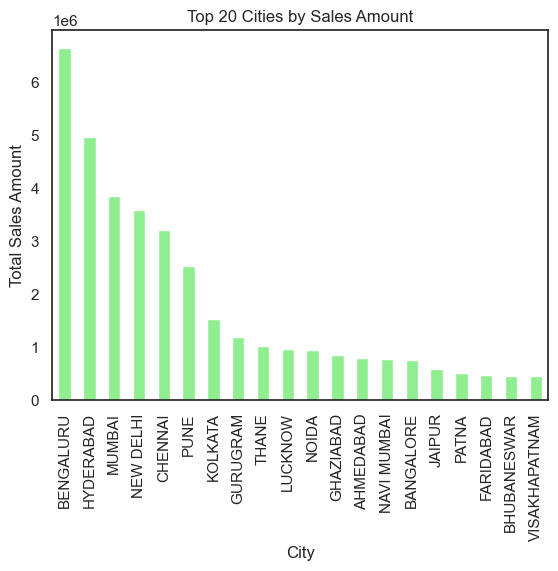

In [135]:
#Visualize Sales Distribution by City
# Plotting sales distribution by city
plt.figure(figsize=(14, 10))
sales_by_city.sort_values(by='Total Sales', ascending=False).head(20).plot(kind='bar', x='City', y='Total Sales', color='lightgreen', legend=False)
plt.title('Top 20 Cities by Sales Amount')
plt.xlabel('City')
plt.ylabel('Total Sales Amount')
plt.show()

In [136]:
# Comparing Sales Growth between cities or States
monthly_sales_by_state = df_copy.groupby([pd.Grouper(key='Date', freq='M'), 'State'])['Total Sales'].sum().unstack()
monthly_sales_by_state.head(3)

State,ANDAMAN & NICOBAR,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHANDIGARH,CHHATTISGARH,DADRA AND NAGAR,GOA,GUJARAT,...,PUDUCHERRY,PUNJAB,RAJASTHAN,SIKKIM,TAMIL NADU,TELANGANA,TRIPURA,UTTAR PRADESH,UTTARAKHAND,WEST BENGAL
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-31,NaN,3621.0,NaN,NaN,4637.0,353.0,899.0,NaN,542.0,4249.0,...,NaN,NaN,1512.0,NaN,7852.0,4080.0,688.0,10979.0,1138.0,8412.0
2022-04-30,46739.0,961031.0,26857.0,403963.0,532406.0,66156.0,201330.0,14531.0,243995.0,884453.0,...,50272.0,442845.0,571963.0,43415.0,1945828.0,2006891.0,37078.0,2318771.0,363459.0,1320544.0
2022-05-31,42018.0,932833.0,31557.0,262681.0,397405.0,68548.0,178438.0,12938.0,181493.0,852642.0,...,53313.0,377628.0,530466.0,40712.0,2010990.0,2096519.0,22131.0,2131739.0,294884.0,1005996.0


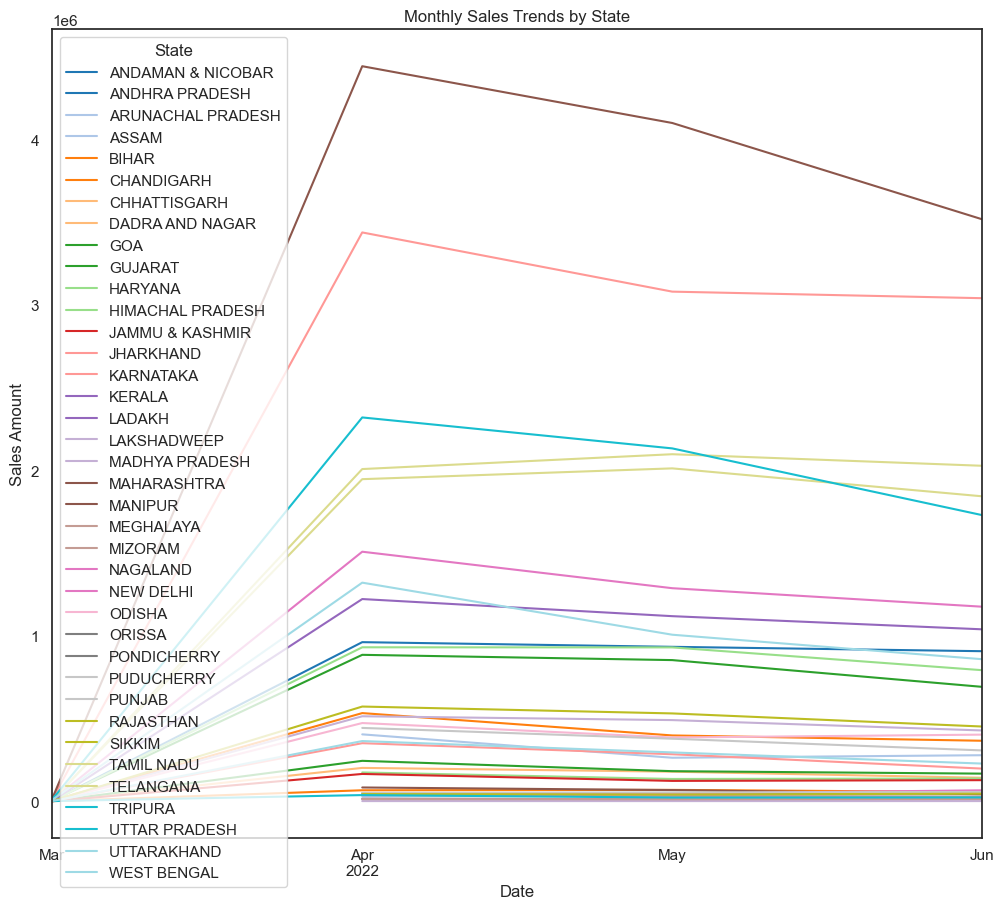

In [137]:
# Plotting the trends
monthly_sales_by_state.plot(kind='line', figsize=(12,10.5), colormap='tab20')
plt.title('Monthly Sales Trends by State')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

<span style="color: green;font-size: 25px">Insights and Observations.</span>

* April month is the highest sales growth.

<span style="color: purple;font-size: 25px">6. Business Insights: Provide actionable insights and recommendations based on the analysis to optimize sales 
strategies, improve customersatisfaction  and enhance overall business performance.  </span>

## 1. Sales Performance Optimization

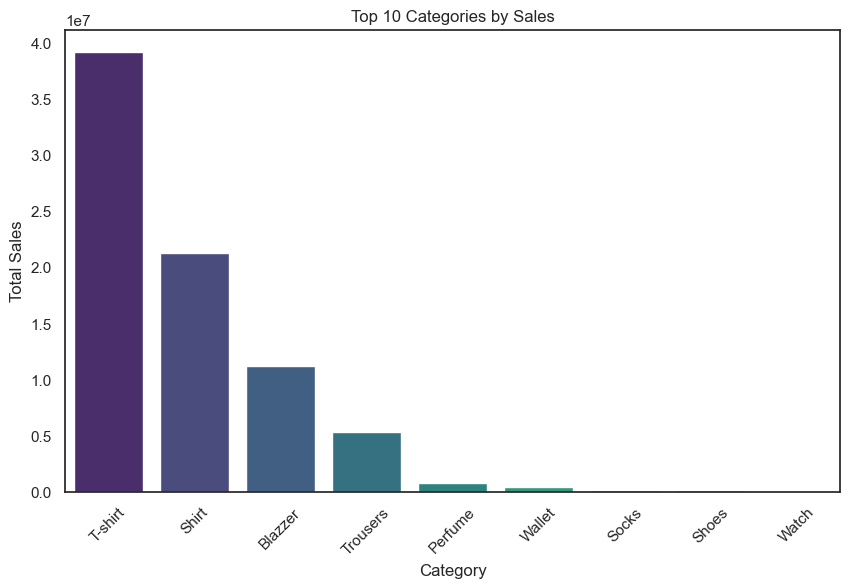

In [138]:
# Total Sales by Category
category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).reset_index()

# Top 10 Categories
plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales.head(10), x='Category', y='Amount', palette='viridis')
plt.title('Top 10 Categories by Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


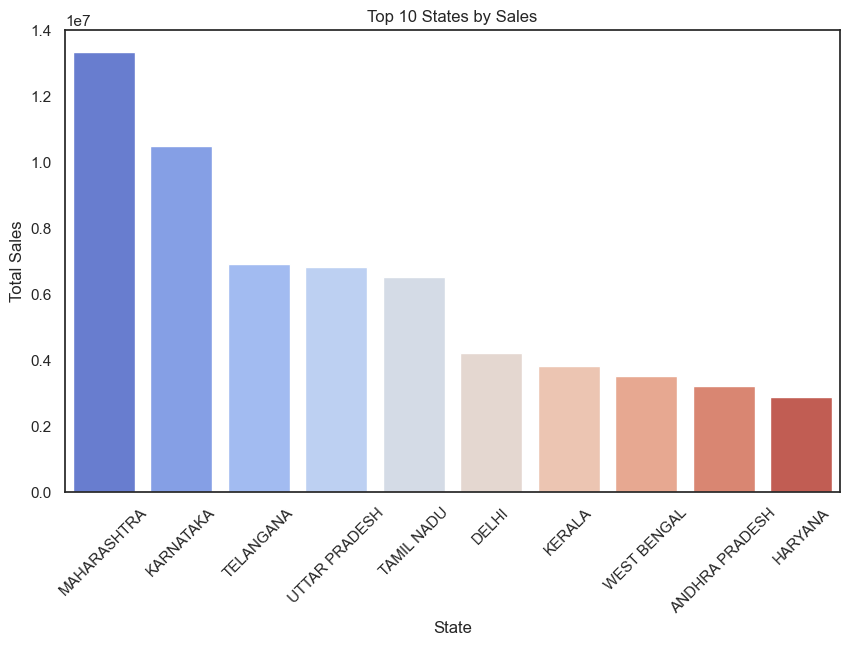

In [139]:
# Regional Performance
state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).reset_index()

# Top 10 States by Sales
plt.figure(figsize=(10, 6))
sns.barplot(data=state_sales.head(10), x='ship-state', y='Amount', palette='coolwarm')
plt.title('Top 10 States by Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()



<span style="color: green;font-size: 25px">Insights:</span>
* Top-performing categories: Certain product categories contribute the most to revenue (e.g., fashion).
* Regional performance: States like Maharashtra, Karnataka, and Telangana drive the highest sales.


<span style="color: red;font-size: 25px">Recommendations:</span>
* Focus marketing campaigns and promotions on high-performing categories and states during peak seasons.
* For underperforming categories, consider targeted discounts, product bundling, or improved listing visibility.
* Expand inventory or warehouse capabilities in top-performing regions to reduce stockouts and shipping times.

## 2. Customer Preferences

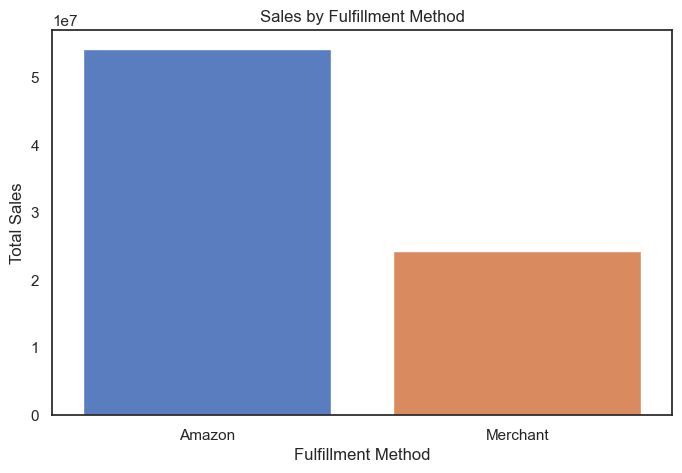

In [140]:
# Fulfillment Method Analysis
fulfillment_sales = df.groupby('Fulfilment')['Amount'].sum().reset_index()

# Plot Fulfillment Methods
plt.figure(figsize=(8, 5))
sns.barplot(data=fulfillment_sales, x='Fulfilment', y='Amount', palette='muted')
plt.title('Sales by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Total Sales')
plt.show()

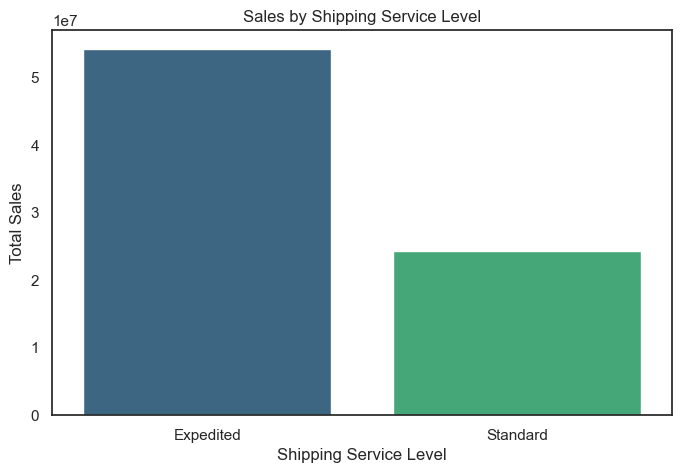

In [141]:
# Shipping Service Level Preferences
shipping_sales = df.groupby('ship-service-level')['Amount'].sum().reset_index()

# Plot Shipping Service Levels
plt.figure(figsize=(8, 5))
sns.barplot(data=shipping_sales, x='ship-service-level', y='Amount', palette='viridis')
plt.title('Sales by Shipping Service Level')
plt.xlabel('Shipping Service Level')
plt.ylabel('Total Sales')
plt.show()


<span style="color: green;font-size: 25px">Insights:</span>
* Customers prefer faster shipping methods like Expedited, but they may be less willing to pay for them.


<span style="color: red;font-size: 25px">Recommendations:</span>
* Offer incentives like free expedited shipping for orders above a certain threshold to encourage higher-value purchases.
* Develop specialized marketing strategies for B2B customers, focusing on bulk deals or subscription-based services.

## 3. Courier Status Analysis

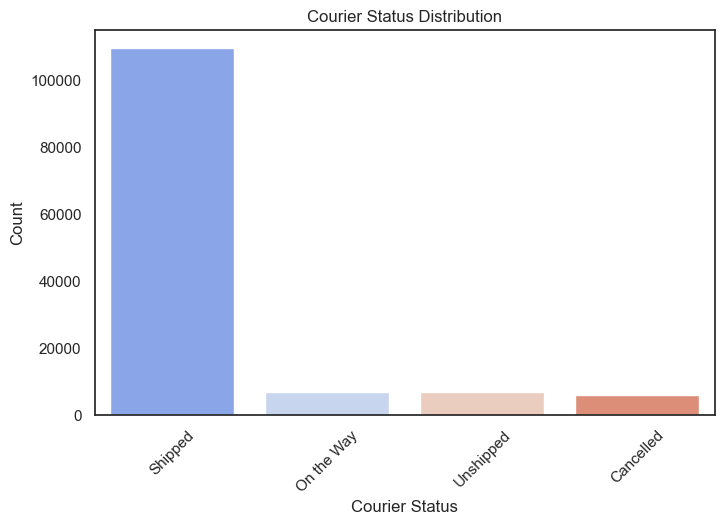

In [142]:
# Courier Status Analysis
courier_status = df['Courier Status'].value_counts().reset_index()
courier_status.columns = ['Courier Status', 'Count']

# Plot Courier Status
plt.figure(figsize=(8, 5))
sns.barplot(data=courier_status, x='Courier Status', y='Count', palette='coolwarm')
plt.title('Courier Status Distribution')
plt.xlabel('Courier Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



<span style="color: green;font-size: 25px">Insights:</span>
* Delays in courier services occur more frequently in specific regions, impacting customer satisfaction.



<span style="color: red;font-size: 25px">Recommendations:</span>
* Analyze courier partner performance in regions with frequent delays; consider switching or onboarding additional partners for those areas.


## 4. Cancellation and Pending Order Analysis

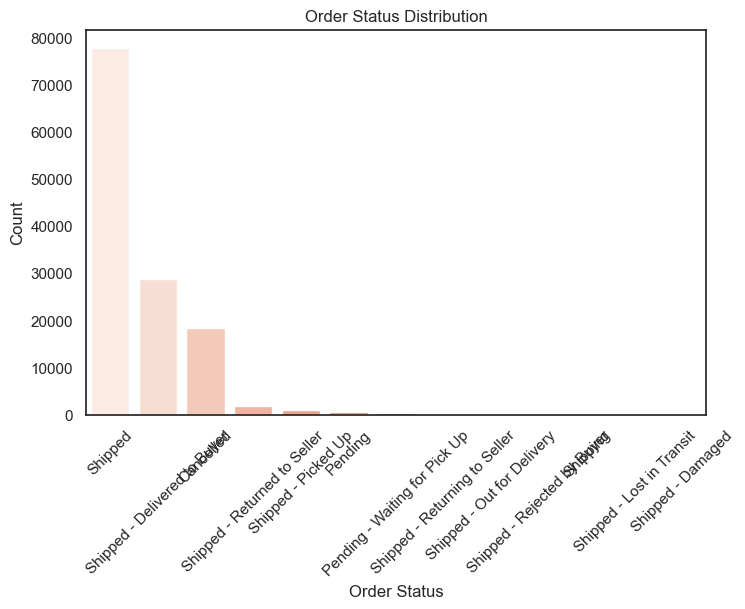

In [143]:
# Order Status Distribution
status_counts = df['Status'].value_counts().reset_index()
status_counts.columns = ['Status', 'Count']

# Plot Order Status Distribution
plt.figure(figsize=(8, 5))
sns.barplot(data=status_counts, x='Status', y='Count', palette='Reds')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


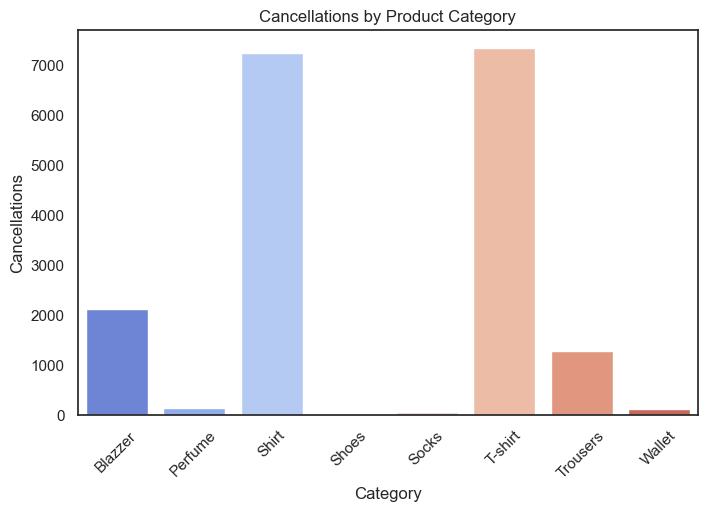

In [144]:
# Cancellations by Category
cancelled_orders = df[df['Status'] == 'Cancelled']
cancelled_by_category = cancelled_orders.groupby('Category')['Order ID'].count().reset_index()
cancelled_by_category.columns = ['Category', 'Cancellations']

# Plot Cancellations by Category
plt.figure(figsize=(8, 5))
sns.barplot(data=cancelled_by_category, x='Category', y='Cancellations', palette='coolwarm')
plt.title('Cancellations by Product Category')
plt.xlabel('Category')
plt.ylabel('Cancellations')
plt.xticks(rotation=45)
plt.show()


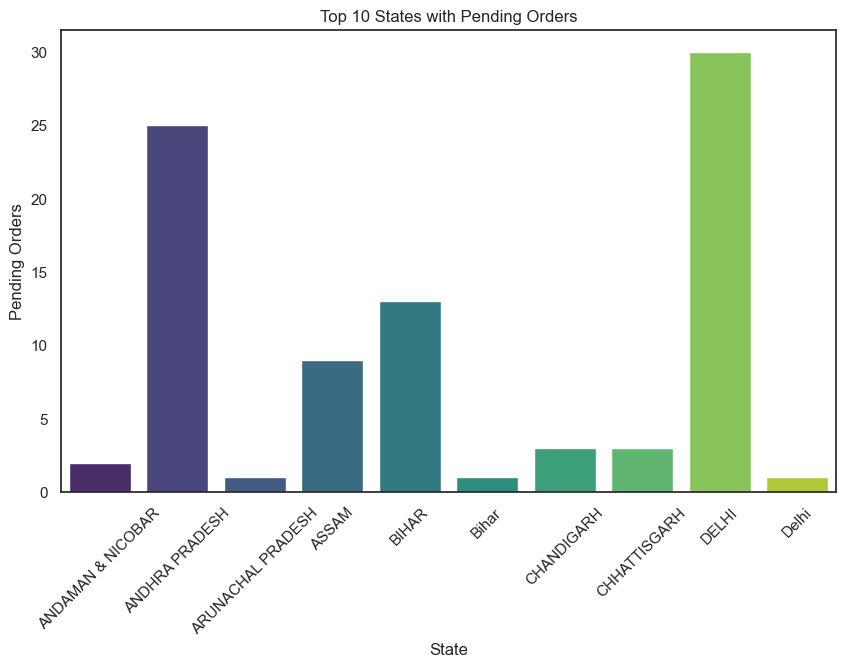

In [145]:
# Pending Orders by State
pending_orders = df[df['Status'] == 'Pending']
pending_by_region = pending_orders.groupby('ship-state')['Order ID'].count().reset_index()
pending_by_region.columns = ['State', 'Pending Orders']

# Plot Pending Orders by State
plt.figure(figsize=(10, 6))
sns.barplot(data=pending_by_region.head(10), x='State', y='Pending Orders', palette='viridis')
plt.title('Top 10 States with Pending Orders')
plt.xlabel('State')
plt.ylabel('Pending Orders')
plt.xticks(rotation=45)
plt.show()

<span style="color: green;font-size: 25px">Insights:</span>
* Cancellations are more common in specific categories, such as high-value items or perishable goods.
* Pending orders are concentrated in states with slower logistics networks or payment processing issues.



<span style="color: red;font-size: 25px">Recommendations:</span>
* Investigate high-cancellation categories to identify root causes (e.g., misleading product descriptions, pricing issues).
* Introduce stricter quality checks and detailed product listings to reduce cancellations.
* Optimize payment gateways and inventory systems to minimize pending orders.
